In [1]:
import pandas as pd
import numpy as np

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

In [11]:
df=pd.read_csv("C:\Ragini\Admission_Prediction.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [13]:
df=df.drop("Serial No.",axis=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [15]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [16]:
df['GRE Score'].isna().sum()

15

In [19]:
df['GRE Score'].mean()

316.55876288659795

In [20]:
df['GRE Score'].median()

317.0

In [21]:
df['GRE Score'].max()

340.0

In [22]:
df['GRE Score'].min()

290.0

In [23]:
df['GRE Score']=df['GRE Score'].fillna(df['GRE Score'].median())
df['GRE Score']

0      337.0
1      324.0
2      317.0
3      322.0
4      314.0
       ...  
495    332.0
496    337.0
497    330.0
498    312.0
499    327.0
Name: GRE Score, Length: 500, dtype: float64

In [25]:
df['GRE Score'].isna().sum()

0

In [27]:
# df['GRE Score'].info()

In [28]:
df['TOEFL Score'].isna().sum()

10

In [29]:
df['TOEFL Score'].mean()

107.18775510204081

In [30]:
df['TOEFL Score'].median()

107.0

In [31]:
df['TOEFL Score']=df['TOEFL Score'].fillna(df['TOEFL Score'].median())
df['TOEFL Score']

0      118.0
1      107.0
2      104.0
3      110.0
4      103.0
       ...  
495    108.0
496    117.0
497    120.0
498    103.0
499    113.0
Name: TOEFL Score, Length: 500, dtype: float64

In [32]:
df['TOEFL Score'].min()

92.0

In [33]:
df['TOEFL Score'].max()

120.0

In [34]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [36]:
df['University Rating'].isna().sum()

15

In [37]:
df['University Rating'].mean()

3.1216494845360825

In [40]:
df['University Rating'].median()

3.0

In [41]:
df['University Rating']=df['University Rating'].fillna(df['University Rating'].median())
df['University Rating']

0      4.0
1      4.0
2      3.0
3      3.0
4      2.0
      ... 
495    5.0
496    5.0
497    5.0
498    4.0
499    4.0
Name: University Rating, Length: 500, dtype: float64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    float64
 1   TOEFL Score        500 non-null    float64
 2   University Rating  500 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


In [44]:
df['SOP'].isna().sum()

0

In [45]:
df['LOR'].isna().sum()

0

In [46]:
df['CGPA'].isna().sum()

0

In [47]:
df['Research'].isna().sum()

0

In [48]:
df['Chance of Admit'].isna().sum()

0

In [49]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,317.0,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [55]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.572000,107.184000,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.104207,6.051395,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [56]:
x=df.drop("Chance of Admit",axis=1)
y=df["Chance of Admit"]

In [57]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,317.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1
496,337.0,117.0,5.0,5.0,5.0,9.87,1
497,330.0,120.0,5.0,4.5,5.0,9.56,1
498,312.0,103.0,4.0,4.0,5.0,8.43,0


In [58]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [59]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.819885,0.623467,0.608349,0.528105,0.818344,0.544756,0.802321
TOEFL Score,0.819885,1.000000,0.644189,0.642976,0.535500,0.805547,0.464858,0.786543
University Rating,0.623467,0.644189,1.000000,0.713657,0.606949,0.697704,0.424966,0.681482
SOP,0.608349,0.642976,0.713657,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.528105,0.535500,0.606949,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.818344,0.805547,0.697704,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.544756,0.464858,0.424966,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.802321,0.786543,0.681482,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

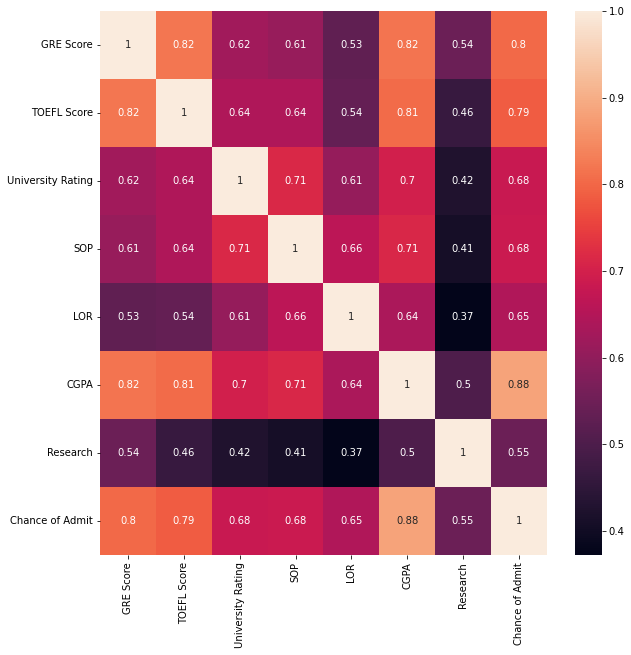

In [64]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [77]:
# sns.pairplot(df.corr())
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
col=df.columns
col

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0,shuffle=True)

In [87]:
model=LinearRegression()

In [88]:
model.fit(x_train,y_train)

LinearRegression()

In [89]:
model.coef_

array([0.00218199, 0.00260394, 0.00605535, 0.0004706 , 0.02008667,
       0.11656087, 0.02488519])

In [91]:
model.intercept_

-1.3529912518635694

In [99]:
# sns.scatterplot(df['CGPA'])
For testing

In [101]:
# for testing dataset

yp=model.predict(x_test)
MSE=mean_squared_error(y_test,yp)
print("MSE : ",MSE)
RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)
MAE=mean_absolute_error(y_test,yp)
print("MAE : ",MAE)
r2=r2_score(y_test,yp)
print("r2 : ",r2)



MSE :  0.00421948833120438
RMSE :  0.06495758871143834
MAE :  0.04921526794383582
r2 :  0.7583997290997936


In [102]:
# for trainning dataset

yp_train=model.predict(x_train)
MSE=mean_squared_error(y_train,yp_train)
print("MSE : ",MSE)
RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)
MAE=mean_absolute_error(y_train,yp_train)
print("MAE : ",MAE)
r2=r2_score(y_train,yp_train)
print("r2 : ",r2)



MSE :  0.00342121540389662
RMSE :  0.05849115662984124
MAE :  0.04188301836382324
r2 :  0.8320389303504183


In [104]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [107]:
x.shape[1]

7

In [109]:
x.to_numpy()

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [317.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  , ...,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   4.  , ...,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.  , ...,   4.5 ,   9.04,   0.  ]])

VIF :  [1277.2030539898267, 1195.3979594797433, 20.709860270100794, 34.46267665971969, 30.950618759326048, 928.8346474974187, 2.8799656101745046]


<AxesSubplot:>

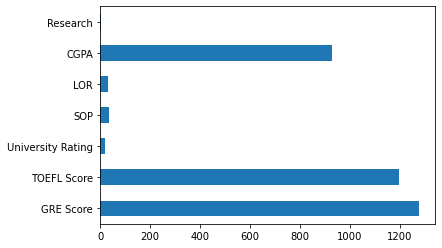

In [110]:
vif_list=[]
for i in range(x.shape[1]):
     vif=variance_inflation_factor(x.to_numpy(),i)
     vif_list.append(vif)
print("VIF : ",vif_list)
s1=pd.Series(vif_list,index=x.columns)
s1.plot(kind='barh')
# s1.sort_values().plot(kind='barh')

In [111]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.819885,0.623467,0.608349,0.528105,0.818344,0.544756,0.802321
TOEFL Score,0.819885,1.000000,0.644189,0.642976,0.535500,0.805547,0.464858,0.786543
University Rating,0.623467,0.644189,1.000000,0.713657,0.606949,0.697704,0.424966,0.681482
SOP,0.608349,0.642976,0.713657,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.528105,0.535500,0.606949,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.818344,0.805547,0.697704,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.544756,0.464858,0.424966,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.802321,0.786543,0.681482,0.684137,0.645365,0.882413,0.545871,1.000000


In [121]:
# Ridge Regression with Hyperparameter Tuning

ridge_model=Ridge()
param_grid={'alpha':np.arange(0.1,10,0.1)}
gscv_ridge_model=GridSearchCV(ridge_model,param_grid,cv=5)
gscv_ridge_model.fit(x_train,y_train)
gscv_ridge_model.best_estimator_




Ridge(alpha=0.8)

In [117]:
lasso_model=Lasso()
param_grid={'alpha':np.arange(0.1,10,0.1)}
gscv_lasso_model=GridSearchCV(lasso_model,param_grid,cv=5)
gscv_lasso_model.fit(x_train,y_train)
gscv_lasso_model.best_estimator_

Lasso(alpha=0.1)

In [122]:
Ridge=Ridge(alpha=0.8)
Ridge.fit(x_train,y_train)

Ridge(alpha=0.8)

In [123]:
# for testing dataset

yp=Ridge.predict(x_test)
MSE=mean_squared_error(y_test,yp)
print("MSE : ",MSE)
RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)
MAE=mean_absolute_error(y_test,yp)
print("MAE : ",MAE)
r2=r2_score(y_test,yp)
print("r2 : ",r2)

MSE :  0.0042305677498659135
RMSE :  0.06504281474433524
MAE :  0.0492571047780632
r2 :  0.7577653416243626


In [124]:
# for trainning dataset

yp_train=Ridge.predict(x_train)
MSE=mean_squared_error(y_train,yp_train)
print("MSE : ",MSE)
RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)
MAE=mean_absolute_error(y_train,yp_train)
print("MAE : ",MAE)
r2=r2_score(y_train,yp_train)
print("r2 : ",r2)



MSE :  0.0034218506182645166
RMSE :  0.05849658638129678
MAE :  0.041890382050445776
r2 :  0.832007745150981


In [125]:
Lasso=Lasso(alpha=0.1)
Lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [126]:
# for testing dataset

yp=Lasso.predict(x_test)
MSE=mean_squared_error(y_test,yp)
print("MSE : ",MSE)
RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)
MAE=mean_absolute_error(y_test,yp)
print("MAE : ",MAE)
r2=r2_score(y_test,yp)
print("r2 : ",r2)

MSE :  0.006863557972013493
RMSE :  0.08284659300184585
MAE :  0.0617210058912822
r2 :  0.6070050832669525


In [127]:
# for trainning dataset

yp_train=Lasso.predict(x_train)
MSE=mean_squared_error(y_train,yp_train)
print("MSE : ",MSE)
RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)
MAE=mean_absolute_error(y_train,yp_train)
print("MAE : ",MAE)
r2=r2_score(y_train,yp_train)
print("r2 : ",r2)

MSE :  0.006260380720813816
RMSE :  0.07912256770867472
MAE :  0.06006916462936405
r2 :  0.6926530141645295


In [128]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [291]:
x=df.drop(['Chance of Admit'],axis=1)

In [292]:
y=df['Chance of Admit']

In [293]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0,shuffle=True)

In [294]:
model=LinearRegression()

In [295]:
model.fit(x_train,y_train)

LinearRegression()

In [296]:
model.coef_

array([0.0022317 , 0.00251116, 0.00628896, 0.00077358, 0.01874885,
       0.11696873, 0.02434833])

In [297]:
model.intercept_

-1.3592373358873484

In [298]:
# for testing dataset

yp=model.predict(x_test)
MSE=mean_squared_error(y_test,yp)
print("MSE : ",MSE)
RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)
MAE=mean_absolute_error(y_test,yp)
print("MAE : ",MAE)
r2=r2_score(y_test,yp)
print("r2 : ",r2)

MSE :  0.003922116967229277
RMSE :  0.06262680709751438
MAE :  0.046707565240850665
r2 :  0.7919380109180971


In [299]:
# for trainning dataset

yp_train=model.predict(x_train)
MSE=mean_squared_error(y_train,yp_train)
print("MSE : ",MSE)
RMSE=np.sqrt(MSE)
print("RMSE : ",RMSE)
MAE=mean_absolute_error(y_train,yp_train)
print("MAE : ",MAE)
r2=r2_score(y_train,yp_train)
print("r2 : ",r2)

MSE :  0.003463665178899458
RMSE :  0.058852911388473025
MAE :  0.04216933167005811
r2 :  0.82803079169276


VIF :  [1277.2030539898267, 1195.3979594797433, 20.709860270100794, 34.46267665971969, 30.950618759326048, 928.8346474974187, 2.8799656101745046]


<AxesSubplot:>

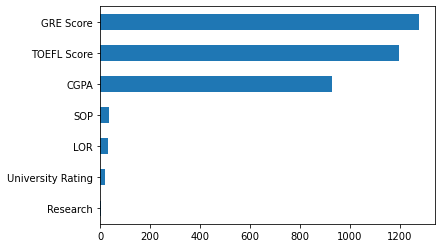

In [300]:
vif_list=[]
for i in range(x.shape[1]):
     vif=variance_inflation_factor(x.to_numpy(),i)
     vif_list.append(vif)
print("VIF : ",vif_list)
s1=pd.Series(vif_list,index=x.columns)

s1.sort_values().plot(kind='barh')

In [301]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [302]:
GRE_Score = 337.0
TOEFL_Score = 118.0
University_Rating = 4.0
SOP = 4.5
LOR = 4.5
CGPA = 9.65
Research = 1


In [303]:
Chance_of_Admit = 0.92

In [304]:
x.head(1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1


In [313]:
test_array=np.zeros(7)

test_array

array([0., 0., 0., 0., 0., 0., 0.])

In [314]:
test_array[0]=GRE_Score
test_array[1]=TOEFL_Score
test_array[2]=University_Rating
test_array[3]=SOP
test_array[4]=LOR
test_array[5]=CGPA
test_array[6]=Research

test_array

array([337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ])

In [315]:
model.predict([test_array])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.9552666])

In [317]:
with open("Linear_model.pkl",'wb') as f:
    pickle.dump(model,f)